# Bangzhu Zhu 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (a)

In [3]:
df.totalprice[(df.totalprice>400000)&(df.garage==1)].count()

6

there are 6 one-garage apartments have a totalprice greater than 400,000 euros

# (b)

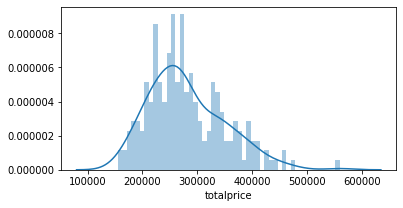

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(6, 3))
sns.distplot(df.totalprice[1:],bins=50)

In [31]:
from scipy.stats import norm
mean = np.mean(df.totalprice)
sv = np.std(df.totalprice,ddof=1)
b = norm.cdf(300000,loc=mean,scale=sv)
a = 1-b
a

0.39054215697577643

probability that totalprice exceeds 300000 is 0.391

# (C)

In [32]:
df1=df._get_numeric_data()
df1.cov()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,4.802276e+09,1.162639e+06,-275569.809042,4306.929479,23103.901095,23829.329737,16364.512574,14244.123620,7536.746579
area,1.162639e+06,4.298508e+02,-15.815009,3.600908,8.392216,6.484930,3.286218,3.291590,1.274237
age,-2.755698e+05,-1.581501e+01,213.031243,-2.522175,-0.766034,-2.049338,-1.408532,-2.402951,-1.581744
floor,4.306929e+03,3.600908e+00,-2.522175,4.524077,0.175538,0.110980,-0.029214,0.172240,-0.103708
rooms,2.310390e+04,8.392216e+00,-0.766034,0.175538,0.402317,0.133514,0.058893,0.090052,0.008456
toilets,2.382933e+04,6.484930e+00,-2.049338,0.110980,0.133514,0.250116,0.102313,0.090263,0.044476
garage,1.636451e+04,3.286218e+00,-1.408532,-0.029214,0.058893,0.102313,0.203293,0.049296,0.028622
elevator,1.424412e+04,3.291590e+00,-2.402951,0.172240,0.090052,0.090263,0.049296,0.161840,0.034668
storage,7.536747e+03,1.274237e+00,-1.581744,-0.103708,0.008456,0.044476,0.028622,0.034668,0.165476


In [33]:
df1.corr()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,1.000000,0.809213,-0.272450,0.029220,0.525627,0.687571,0.523742,0.510939,0.267358
area,0.809213,1.000000,-0.052262,0.081656,0.638166,0.625425,0.351541,0.394643,0.151086
age,-0.272450,-0.052262,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.029220,0.081656,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.525627,0.638166,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.687571,0.625425,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.523742,0.351541,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.510939,0.394643,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
storage,0.267358,0.151086,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


# (d)

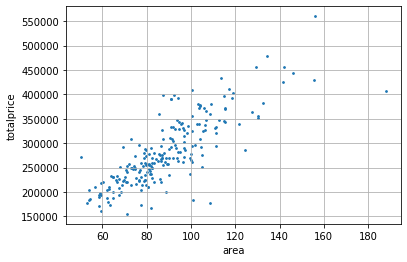

In [36]:
plt.scatter(df['area'], df['totalprice'],s=3)
plt.ylabel('totalprice')
plt.xlabel('area')
plt.grid()

In [63]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y = df['totalprice']
x = pd.DataFrame(df['area'])
reg.fit(x,y)
y_pred=reg.predict(x)
n=df.shape
outlier = 0
row = 0
for i in range(0,n[0]):
               a=abs(y_pred[i]-y[i])
               if a>outlier:
                outlier=a
                row=i+1
row

44

In [65]:
outlier

156125.62381751765

In [100]:
df.totalprice[44-1]

178000.0

In [99]:
df.area[44-1]

108.4400024

row number, area and totalprice is 44, 108.44, 178000

# (e)

In [91]:
df['category'].loc[df['category'] == '2A'] = 2
df['category'].loc[df['category'] == '2B'] = 2
df['category'].loc[df['category'] == '3A'] = 3
df['category'].loc[df['category'] == '3B'] = 3
df['category'].loc[df['category'] == '4A'] = 4
df['category'].loc[df['category'] == '4B'] = 4
df['category'].loc[df['category'] == '5A'] = 5
df['category'].loc[df['category'] == '5B'] = 5

In [93]:
df.pivot_table('totalprice',index='category',aggfunc=np.median)

,totalprice
category,
2,345500.0
3,279000.0
4,224000.0
5,183000.0
